In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
X_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_training_data_X.csv')
Y_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_training_data_Y.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_testing_data_X.csv')

In [3]:
X_train.head()

,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
0,4,0.7,0.8,1.80000
1,4,0.7,0.8,1.58333
2,4,0.7,0.8,1.41322
3,4,0.7,0.8,1.27612
4,4,0.7,0.8,1.16327


In [4]:
Y_train.head()

,neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm)
0,1.27828,4.96730,587.055,185.178000
1,1.29633,2.49561,685.141,40.180900
2,1.31463,1.68857,576.543,6.514520
3,1.33194,1.33313,396.421,0.914075
4,1.34753,1.13895,229.820,0.123961


### Task (i)

In [5]:
# neff regression
y_train =  Y_train.iloc[:,0]

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data
neff_hat = reg.predict(X_train)
r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.8385 

Coefficients of Linear Model: [ 0.00036323 -0.08278557  0.05496765 -0.08231239] 

Intercept: 1.4807876659562593


### Task (ii)

In [6]:
# Aeff regression
y_train =  Y_train.iloc[:,1]

reg2 = LinearRegression()         # Instantiate
reg2.fit(X_train, y_train)        # Fit the train data

r2_train_score2 = reg2.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score2, 4), '\n')
print('Coefficients of Linear Model:', reg2.coef_, '\n')
print('Intercept:', reg2.intercept_)

R^2 score for train dataset =  0.9139 

Coefficients of Linear Model: [-0.0221067  -3.82759534  2.12675397  1.08063448] 

Intercept: 1.0551163872380802


### Task (iii)

In [7]:
# dispersion regression
y_train =  Y_train.iloc[:,2]

reg3 = LinearRegression()         # Instantiate
reg3.fit(X_train, y_train)        # Fit the train data

r2_train_score3 = reg3.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score3, 4), '\n')
print('Coefficients of Linear Model:', reg3.coef_, '\n')
print('Intercept:', reg3.intercept_)

R^2 score for train dataset =  0.377 

Coefficients of Linear Model: [-4.85338463e-02  2.85970072e+02 -1.43231417e+02  4.48265865e+01] 

Intercept: 102.8351923141426


### Task (iv)

In [8]:
# Loss regression
y_train =  Y_train.iloc[:,3]

reg4 = LinearRegression()         # Instantiate
reg4.fit(X_train, y_train)        # Fit the train data

r2_train_score4 = reg4.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score4, 4), '\n')
print('Coefficients of Linear Model:', reg4.coef_, '\n')
print('Intercept:', reg4.intercept_)

R^2 score for train dataset =  0.0626 

Coefficients of Linear Model: [-0.99673669 -5.2714014  -3.0226698   4.86558539] 

Intercept: 8.938483159223429


### Task (v)

In [9]:
# Loss regression
y_train =  np.log10(np.absolute(Y_train.iloc[:,3]))

reg4 = LinearRegression()         # Instantiate
reg4.fit(X_train, y_train)        # Fit the train data

r2_train_score4 = reg4.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score4, 4), '\n')
print('Coefficients of Linear Model:', reg4.coef_, '\n')
print('Intercept:', reg4.intercept_)

R^2 score for train dataset =  0.9216 

Coefficients of Linear Model: [ -3.06634208 -33.91289988  -7.74353745  10.86439454] 

Intercept: 27.101174261931625


In [10]:
neff_pred = reg.predict(X_test)

In [11]:
Aeff_pred = reg2.predict(X_test)

In [12]:
disp_pred = reg3.predict(X_test)

In [13]:
loss_pred = 10**(reg4.predict(X_test))

(array([969.,   1.,   4.,   2.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([4.000000e-23, 1.851780e+01, 3.703560e+01, 5.555340e+01,
        7.407120e+01, 9.258900e+01, 1.111068e+02, 1.296246e+02,
        1.481424e+02, 1.666602e+02, 1.851780e+02]),
 <BarContainer object of 10 artists>)

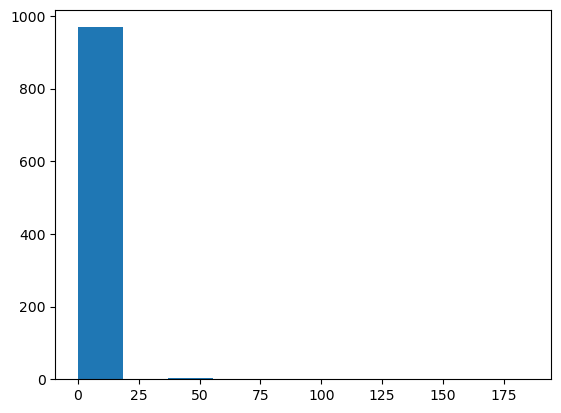

In [14]:
plt.hist(Y_train.iloc[:,3].values)

(array([164., 110.,  89., 114., 124., 131., 103.,  67.,  46.,  30.]),
 array([-22.39794001, -19.93138707, -17.46483413, -14.99828119,
        -12.53172825, -10.06517531,  -7.59862237,  -5.13206943,
         -2.66551649,  -0.19896355,   2.26758939]),
 <BarContainer object of 10 artists>)

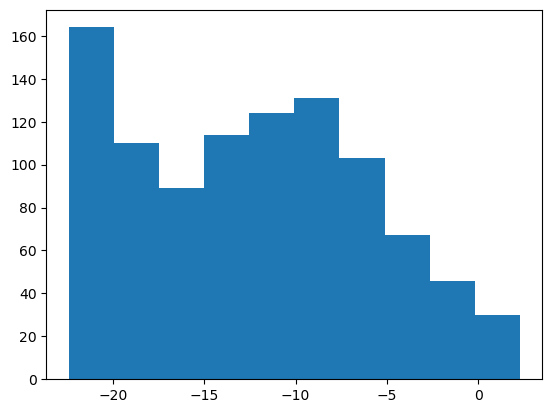

In [15]:
plt.hist(np.log10(Y_train.iloc[:,3].values))

### Task (vi)

In [16]:
df2 = pd.DataFrame({'neff_pred':neff_pred, 'Aeff_pred':Aeff_pred, 'disp_pred':disp_pred, 'loss_pred':loss_pred})

In [17]:
df2.head(10)

,neff_pred,Aeff_pred,disp_pred,loss_pred
0,1.366811,3.314582,164.178178,8.931833e-03
1,1.375042,3.206519,159.695520,7.319832e-04
2,1.383274,3.098456,155.212861,5.998762e-05
3,1.391505,2.990392,150.730202,4.916117e-06
4,1.399736,2.882329,146.247544,4.028865e-07
5,1.407967,2.774265,141.764885,3.301743e-08
6,1.416199,2.666202,137.282226,2.705851e-09
7,1.424430,2.558138,132.799568,2.217504e-10
8,1.432661,2.450075,128.316909,1.817293e-11
9,1.440892,2.342011,123.834250,1.489311e-12


True values were as follow:

|neff|Aeff (um^2)|dispersion (ps/km.nm)|conf-loss (dB/cm)|
| --- | --- | --- | --- |
1.38489|3.04184|42.96|1.55E-04|
1.39268|2.90433|66.7628|3.25E-05|
1.40035|2.78024|86.4249|6.03E-06|
1.40784|2.66742|102.097|9.79E-07|
1.41511 | 2.56412|114.007|1.38E-07|
1.42213|2.46894|122.422|1.67E-08|
1.428834|2.38074|127.624|1.73E-09|
1.43519|2.29861|129.864|1.53E-10|
1.44116|2.22181|129.341|1.17E-11|
1.4467|2.14976|126.183|7.86E-13|